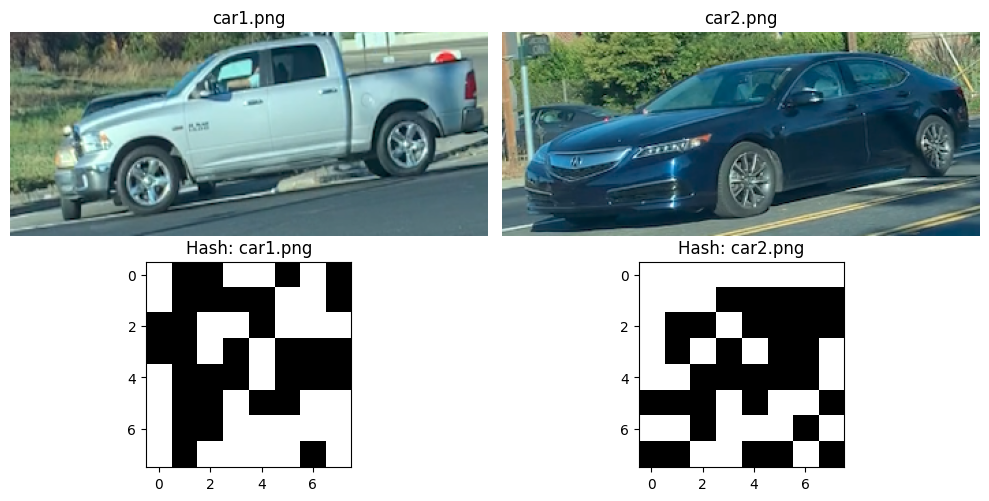

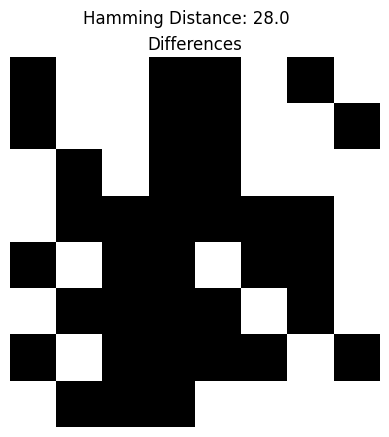

In [1]:
from display_images_from_paths_or_array import display_images
from display_image_hashes import visualize_image_hashes
from add_noise_to_image import add_noise
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import cv2

# **Detecting Edges Using Image Hashing and Filtering**
---

## **Pengambilan Sidik Jari Gambar (Image Hashing)**
---

Sidik jari gambar adalah cara untuk menemukan kesamaan antara gambar-gambar. Ini mengubah gambar menjadi vektor biner berukuran tetap (serangkaian 0 dan 1) melalui proses yang disebut transformasi. Ada beberapa metode untuk membuat sidik jari gambar:

- **Perceptual hash (phash)**: Menggunakan transformasi kosinus.
- **Difference hash (dhash)**: Menggunakan perbedaan antara piksel yang berdekatan.

Setelah mengubah gambar-gambar ini, kita dapat membandingkannya dengan cepat menggunakan Jarak Hamming (Hamming distance). Jarak Hamming sebesar 0 berarti gambar-gambar tersebut identik (salinan yang sama persis), sedangkan jarak Hamming yang lebih besar berarti gambar-gambar tersebut berbeda.

Berikut adalah contoh kode Python sederhana yang menunjukkan cara kerjanya. Kode ini menggunakan paket Python seperti PIL (Python Imaging Library), imagehash (untuk algoritma hashing), dan distance (untuk menghitung Jarak Hamming):

```python
from PIL import Image
import imagehash
import distance
import scipy.spatial

# Memuat gambar dan menghitung hash-nya
hash1 = imagehash.phash(Image.open('path/to/car1.png'))
hash2 = imagehash.phash(Image.open('path/to/car2.png'))

# Menghitung dan mencetak Jarak Hamming
print(distance.hamming(hash1.hash.flatten(), hash2.hash.flatten()))
```

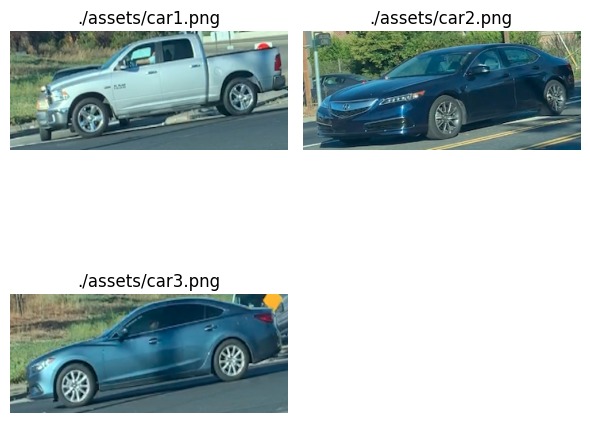

In [7]:
parent_path = './assets'
image_paths = [parent_path+'/car1.png', parent_path+'/car2.png', parent_path+'/car3.png']

display_images(
    images=image_paths, 
    titles=image_paths, 
    is_gray=False, 
    is_axis=False,
)

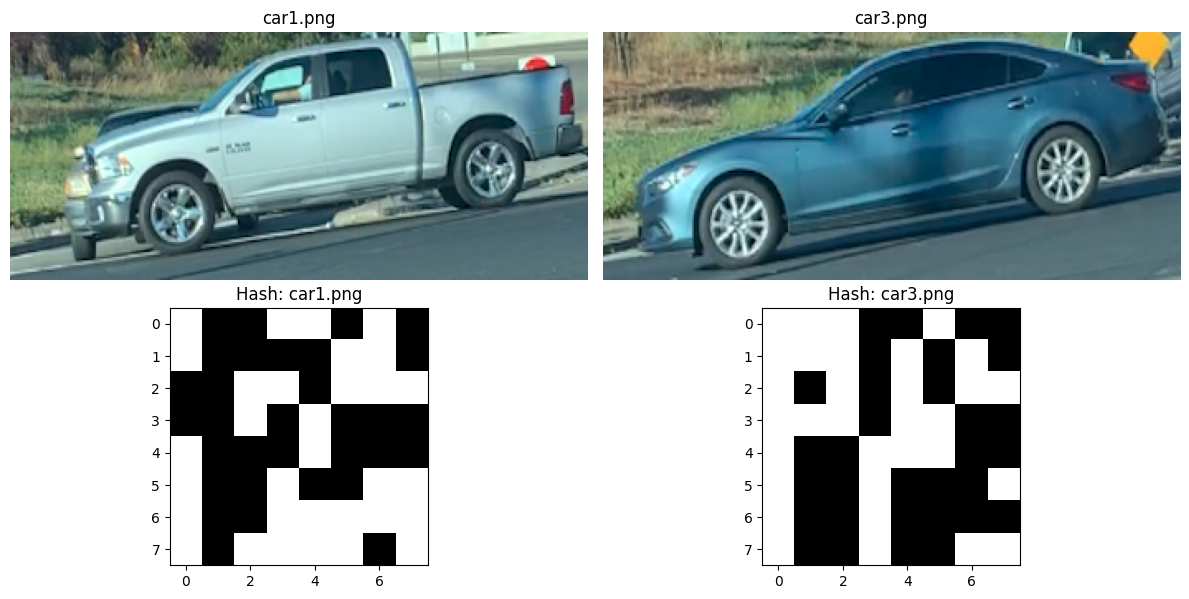

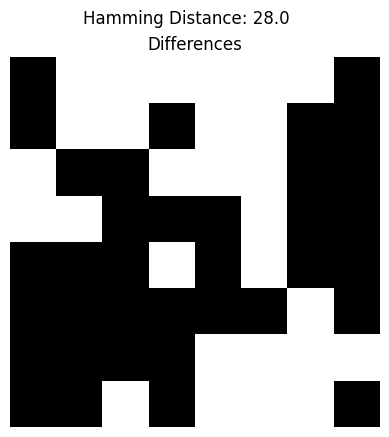

In [3]:
# Contoh penggunaan fungsi
image_path1 = './assets/car1.png'
image_path2 =  './assets/car3.png'
visualize_image_hashes(image_path1, image_path2, figsize=(12, 6))

### Pengertian dan Kegunaan Jarak Hamming

**Jarak Hamming** adalah sebuah ukuran yang digunakan untuk membandingkan dua string atau bit. Jarak Hamming antara dua string dengan panjang yang sama adalah jumlah posisi di mana karakter yang bersesuaian berbeda. Dalam konteks hash gambar, Hamming distance digunakan untuk mengukur seberapa mirip atau berbedanya dua gambar berdasarkan representasi hash mereka.

#### Maksud Jarak Hamming

- **Jarak Hamming 0**: Jika dua gambar memiliki jarak Hamming 0, ini berarti hash mereka identik, yang menunjukkan bahwa gambar-gambar tersebut sangat mirip atau sama.
- **Jarak Hamming Tinggi**: Semakin besar jarak Hamming, semakin banyak perbedaan antara dua gambar berdasarkan representasi hash mereka. Ini menunjukkan bahwa gambar-gambar tersebut kurang mirip.

#### Kegunaan Jarak Hamming dalam Analisis Gambar

1. **Pencarian dan Pengelompokan Gambar Mirip**:
   - Jarak Hamming dapat digunakan untuk mencari gambar yang mirip dalam sebuah dataset besar. Misalnya, dalam aplikasi pencarian gambar, Anda bisa mencari gambar-gambar yang mirip dengan gambar yang diberikan oleh pengguna.

2. **Deteksi Duplikasi**:
   - Dalam sistem penyimpanan gambar, Hamming distance bisa digunakan untuk mendeteksi gambar duplikat. Gambar dengan jarak Hamming 0 atau sangat rendah dianggap duplikat dan dapat dihapus atau disimpan dengan perlakuan khusus.

3. **Perbandingan Gambar**:
   - Jarak Hamming memungkinkan perbandingan cepat antara gambar tanpa memerlukan pengolahan gambar yang kompleks. Ini bermanfaat dalam aplikasi yang membutuhkan penilaian cepat mengenai kesamaan gambar.

4. **Klasifikasi Gambar**:
   - Dalam beberapa aplikasi, jarak Hamming dapat digunakan sebagai fitur untuk algoritma klasifikasi. Gambar dengan jarak Hamming yang rendah dari sebuah gambar acuan mungkin termasuk dalam kategori yang sama.

#### Contoh Aplikasi

- **Sistem Pengelolaan Konten**:
  - Dalam sistem yang mengelola banyak konten gambar, jarak Hamming digunakan untuk mengelompokkan dan mengelola gambar yang mirip. Misalnya, sistem bisa secara otomatis mengelompokkan foto yang diambil pada acara yang sama atau dengan latar belakang yang mirip.
  
- **Pencarian Gambar di Internet**:
  - Layanan seperti Google Images menggunakan algoritma yang kompleks, termasuk jarak Hamming, untuk menemukan gambar yang mirip di internet berdasarkan input dari pengguna.
  
- **Forensik Digital**:
  - Dalam forensik digital, analisis hash dan jarak Hamming dapat membantu dalam mendeteksi gambar yang telah dimodifikasi atau diubah dari versi aslinya.

#### Contoh Visualisasi

Dalam konteks visualisasi yang kita lakukan di kode sebelumnya, kita melihat dua gambar dan hash mereka, serta perbedaan antara hash:

- **Gambar Asli**: Menunjukkan gambar yang kita analisis.
- **Hash Gambar**: Menunjukkan representasi hash dari gambar.
- **Perbedaan Hash**: Menunjukkan posisi di mana bit hash berbeda, yang secara visual memperlihatkan mengapa jarak Hamming tersebut memiliki nilai tertentu.

Dengan pemahaman ini, Anda dapat menggunakan jarak Hamming untuk berbagai aplikasi yang melibatkan perbandingan dan analisis gambar, membuat proses ini lebih efisien dan efektif.

## **Penyaringan Gambar (Image Filtering)**
---

Penyaringan gambar adalah operasi dasar dalam visi komputer yang mengubah gambar input dengan menerapkan filter pada setiap piksel. Berikut adalah langkah-langkah yang terlibat dalam penyaringan gambar:

1. **Menggunakan filter Bayer**: Filter ini membantu membentuk pola warna.
2. **Membuat vektor gambar**: Mengubah gambar menjadi vektor (daftar angka).
3. **Mengubah gambar**: Mengubah gambar menggunakan operasi matematika.
4. **Penyaringan linier**: Menerapkan filter (kernel) ke gambar menggunakan konvolusi.
5. **Mencampur filter Gaussian dan Laplacian**: Menggabungkan filter yang berbeda untuk meningkatkan gambar.
6. **Mendeteksi tepi**: Menemukan tepi dalam gambar.

### Contoh

Bayangkan kamu memiliki foto yang buram dan ingin membuatnya lebih jelas. Kamu bisa menggunakan penyaringan gambar untuk menajamkan tepi dan membuat detail lebih menonjol. Dengan menerapkan berbagai filter, kamu bisa meningkatkan gambar dan melihat lebih banyak detail.

### **Memahami Filter Bayer**
---

Filter Bayer membantu mengubah gambar hitam-putih dari kamera menjadi gambar berwarna yang terlihat seperti yang kita lihat dengan mata kita.

#### Cara Kerjanya

- Kamera memiliki bagian kecil yang disebut **fotodioda** yang menangkap cahaya dan mengubahnya menjadi sinyal.
- Sinyal ini awalnya hitam-putih karena fotodioda tidak melihat warna.
- Untuk mendapatkan warna, kita menggunakan sesuatu yang disebut **filter Bayer**.
- Filter ini memiliki banyak kotak kecil berwarna: **Merah**, **Hijau**, dan **Biru**.
- Ada dua kali lebih banyak kotak Hijau karena mata kita lebih baik dalam melihat warna hijau.

#### Membuat Warna

- Setiap kotak berwarna hanya membiarkan warna mereka sendiri masuk—seperti Merah untuk kotak Merah.
- Dengan mencampur warna-warna ini dengan cara yang berbeda, kita bisa membuat semua warna lain yang kita lihat dalam foto!

#### Dari Kamera ke Foto

1. **Menggunakan filter Bayer**: Filter ini membantu membentuk pola warna.
2. **Membuat vektor gambar**: Mengubah gambar menjadi vektor (daftar angka).
3. **Mengubah gambar**: Mengubah gambar menggunakan operasi matematika.
4. **Penyaringan linier**: Menerapkan filter (kernel) ke gambar menggunakan konvolusi.
5. **Mencampur filter Gaussian dan Laplacian**: Menggabungkan filter yang berbeda untuk meningkatkan gambar.
6. **Mendeteksi tepi**: Menemukan tepi dalam gambar.

#### Teknologi Masa Depan

Ilmuwan bekerja untuk membuat proses ini lebih pintar menggunakan sesuatu yang disebut CNN—ini membantu kamera mengenali hal-hal seperti anjing atau mobil secara otomatis!

#### Contoh Filter Bayer

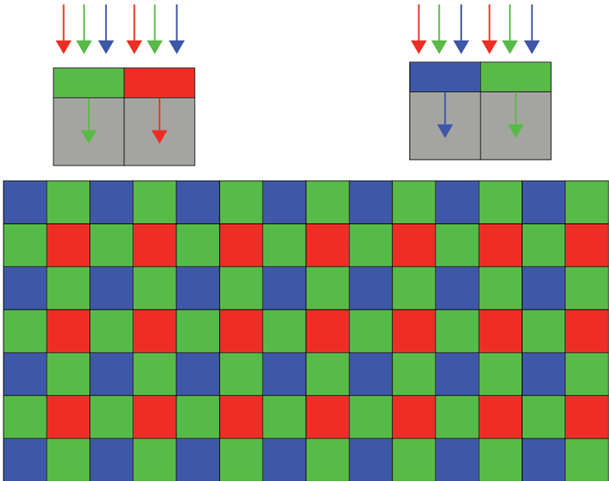

Dalam diagram, kamu bisa melihat:

- Filter Bayer memiliki kotak Merah (R), Hijau (G), dan Biru (B) dalam pola tertentu.
- Ada dua kali lebih banyak kotak Hijau dibandingkan dengan Merah dan Biru.
- Kotak-kotak tersebut diatur dalam pola seperti RGGB, GRGB, atau RGBG.
- Setiap kotak hanya membiarkan warnanya masuk, dan bersama-sama mereka menciptakan gambar berwarna.

Ingat: Ini seperti memiliki tiga kacamata berwarna—Merah, Hijau, Biru—dan melihat melalui mereka bersama-sama membuat semua jenis warna!

### **Pembuatan Vektor Gambar**
---

**Gambar berwarna** adalah kombinasi dari tiga saluran warna: Merah (R), Hijau (G), dan Biru (B). Setiap warna dapat direpresentasikan sebagai nilai intensitas yang berkisar dari 0 hingga 255. Oleh karena itu, setiap gambar dapat direpresentasikan sebagai kubus tiga dimensi, dengan sumbu x dan y mewakili lebar dan tinggi, serta sumbu z mewakili tiga saluran warna (R, G, B) yang menunjukkan intensitas masing-masing warna.

**OpenCV** adalah perpustakaan dengan fungsi pemrograman bawaan yang ditulis untuk Python dan C++ untuk pemrosesan gambar dan deteksi objek.

#### Contoh Kode Python
Berikut adalah contoh kode Python untuk mengimpor gambar, mengubahnya menjadi array NumPy, dan mengekstrak komponen warna RGB:

```python
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Mengimpor gambar
image = Image.open('path_to_image/car.jpeg')  # masukkan path gambar
plt.imshow(image)
plt.show()

# Mengonversi gambar menjadi array NumPy
image_arr = np.asarray(image)
print(image_arr.shape)  # Output: (296, 465, 4)

# Mengonversi gambar menjadi grayscale
gray = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

# Menampilkan komponen warna R, G, dan B
plt.imshow(image_arr[:,:,0])  # saluran merah
plt.show()
plt.imshow(image_arr[:,:,1])  # saluran hijau
plt.show()
plt.imshow(image_arr[:,:,2])  # saluran biru
plt.show()
```

#### Aplikasi dan Kegunaan
1. **Pemrosesan Gambar:** Memungkinkan manipulasi gambar seperti konversi ke grayscale, ekstraksi saluran warna, dan lain-lain.
2. **Deteksi Objek:** Digunakan dalam aplikasi seperti pengenalan wajah, pengenalan tulisan tangan, dan deteksi objek.
3. **Analisis Gambar:** Memungkinkan analisis gambar yang lebih akurat dengan mengekstraksi fitur penting dari gambar.

#### Mengapa Kita Perlu Mempelajarinya?
1. **Peningkatan Visual:** Membantu dalam meningkatkan kualitas visual gambar, yang penting dalam berbagai bidang seperti fotografi, pengolahan gambar medis, dan pengawasan.
2. **Analisis Gambar:** Memungkinkan analisis gambar yang lebih akurat dengan mengekstraksi fitur penting dari gambar.
3. **Pengenalan Objek:** Membantu dalam pengenalan objek dan pola dengan mengekstraksi fitur penting dari gambar.

Dengan memahami dan menggunakan teknik pembuatan vektor gambar, kita dapat mengembangkan sistem pemrosesan gambar yang lebih canggih dan akurat.

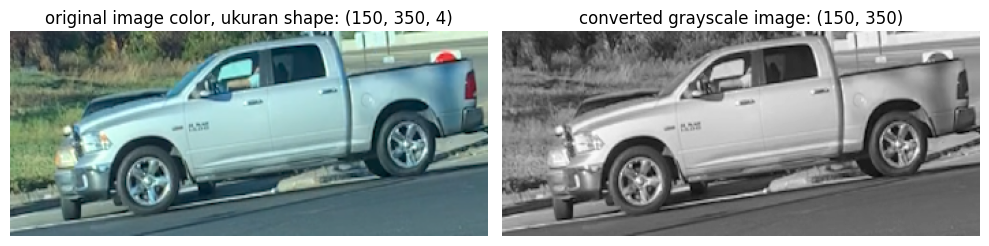

In [4]:
# https://pillow.readthedocs.io/en/stable/reference/Image.html

target_image_path = '/car1.png'


# Cara Pertama untuk load dan konversi ke grayscale image, dengan PIL dan openCV, dan perlu diubah numpy dahulu sebelum di ubah gray scale dengan OpenCV
# image = Image.open(parent_path+target_image_path)
# image_cvt_to_gray=cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)

# Cara kedua untuk load dan konversi ke grayscale image, dengan PIL saja, untuk processing perlu di ubah ke numpy setelah di grayscale
image = Image.open(parent_path+target_image_path)
image_cvt_to_gray=image.convert('L')

titles = [f'original image color, ukuran shape: {np.array(image).shape}', f'converted grayscale image: {np.array(image_cvt_to_gray).shape}']
imgs = [image, image_cvt_to_gray]
display_images(images=imgs, figsize_per_image=(5, 4), titles=titles, is_gray=True)

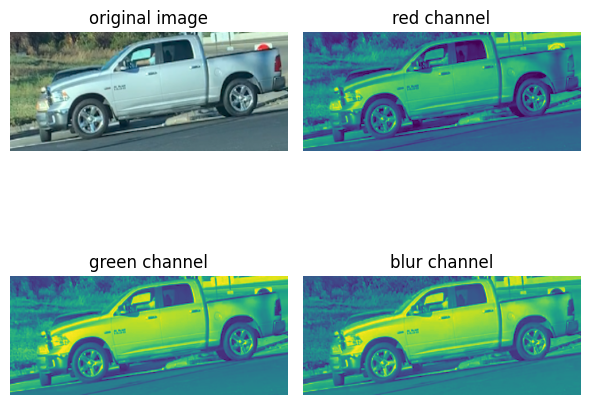

In [5]:
image_arr = np.array(image)

titles = ['original image', 'red channel', 'green channel', 'blur channel']
imgs = [image_arr, image_arr[:,:,0], image_arr[:,:,1], image_arr[:,:,2]]
display_images(images=imgs, titles=titles)

### **Transformasi Gambar**
---

**Transformasi gambar** melibatkan translasi (pergeseran), rotasi, pembesaran, atau geseran dari sebuah gambar. Jika (x,y) adalah koordinat piksel dari sebuah gambar, maka koordinat gambar yang telah ditransformasi (u,v) dari piksel baru dapat direpresentasikan sebagai berikut:

Tentu, berikut adalah penjelasan transformasi gambar dalam bentuk perhitungan matriks dengan langkah-langkah yang lebih rinci:

1. **Translasi (Pergeseran)**: Misalkan kita memiliki titik \(P(x, y)\) dan kita ingin menggesernya sejauh \(t_x\) unit ke kanan dan \(t_y\) unit ke atas. Dalam koordinat homogen, titik \(P\) dapat ditulis sebagai vektor kolom \([x, y, 1]^T\). Maka, operasi translasi dapat dilakukan dengan perkalian matriks sebagai berikut:

    $$
    \begin{bmatrix}
    1 & 0 & t_x \\
    0 & 1 & t_y \\
    0 & 0 & 1
    \end{bmatrix}
    \begin{bmatrix}
    x \\
    y \\
    1
    \end{bmatrix}
    =
    \begin{bmatrix}
    x + t_x \\
    y + t_y \\
    1
    \end{bmatrix}
    $$

2. **Rotasi**: Misalkan kita memiliki titik \(P(x, y)\) dan kita ingin memutarnya sebesar \(\theta\) derajat berlawanan arah jarum jam. Operasi rotasi dapat dilakukan dengan perkalian matriks sebagai berikut:

    $$
    \begin{bmatrix}
    \cos(\theta) & -\sin(\theta) \\
    \sin(\theta) & \cos(\theta)
    \end{bmatrix}
    \begin{bmatrix}
    x \\
    y
    \end{bmatrix}
    =
    \begin{bmatrix}
    x\cos(\theta) - y\sin(\theta) \\
    x\sin(\theta) + y\cos(\theta)
    \end{bmatrix}
    $$

3. **Pembesaran (Skala)**: Misalkan kita memiliki titik \(P(x, y)\) dan kita ingin memperbesar ukurannya sebesar \(s_x\) kali pada sumbu x dan \(s_y\) kali pada sumbu y. Operasi skala dapat dilakukan dengan perkalian matriks sebagai berikut:

    $$
    \begin{bmatrix}
    s_x & 0 \\
    0 & s_y
    \end{bmatrix}
    \begin{bmatrix}
    x \\
    y
    \end{bmatrix}
    =
    \begin{bmatrix}
    s_x \cdot x \\
    s_y \cdot y
    \end{bmatrix}
    $$

4. **Geseran (Shear)**: Misalkan kita memiliki titik \(P(x, y)\) dan kita ingin menerapkan geseran horizontal sebesar \(s_h\) dan geseran vertikal sebesar \(s_v\). Operasi geseran dapat dilakukan dengan perkalian matriks sebagai berikut:

    * Geseran Horizontal:

        $$
        \begin{bmatrix}
        1 & s_h \\
        0 & 1
        \end{bmatrix}
        \begin{bmatrix}
        x \\
        y
        \end{bmatrix}
        =
        \begin{bmatrix}
        x + s_h \cdot y \\
        y
        \end{bmatrix}
        $$

    * Geseran Vertikal:

        $$
        \begin{bmatrix}
        1 & 0 \\
        s_v & 1
        \end{bmatrix}
        \begin{bmatrix}
        x \\
        y
        \end{bmatrix}
        =
        \begin{bmatrix}
        x \\
        s_v \cdot x + y
        \end{bmatrix}
        $$

Transformasi gambar sangat membantu dalam visi komputer untuk mendapatkan gambar yang berbeda dari gambar yang sama. Ini membantu komputer mengembangkan model jaringan saraf tiruan yang tangguh terhadap translasi, rotasi, dan geseran. Sebagai contoh, jika kita hanya memasukkan gambar bagian depan mobil ke dalam jaringan saraf konvolusional (CNN) selama fase pelatihan, model tersebut tidak akan dapat mendeteksi gambar mobil yang diputar 90 derajat selama fase pengujian.

Dengan kata lain, transformasi gambar memungkinkan model untuk 'melihat' objek dari berbagai sudut dan skala, sehingga meningkatkan kemampuannya dalam mengenali objek tersebut dalam berbagai kondisi.

In [6]:
# Membaca gambar
img = cv2.imread(parent_path+'/car1.png', cv2.IMREAD_GRAYSCALE)

# Mendapatkan ukuran gambar
rows, cols = img.shape

# Membuat matriks transformasi untuk translasi
M_translation = np.float32([[1, 0, 100], [0, 1, 50]]) # geser 100 piksel ke kanan dan 50 piksel ke bawah
translated_img = cv2.warpAffine(img, M_translation, (cols, rows))


# Membuat matriks transformasi untuk rotasi
M_rotation = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1) # putar 90 derajat searah jarum jam
rotated_img = cv2.warpAffine(img, M_rotation, (cols, rows))


# Membuat matriks transformasi untuk skala
rescaled_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC) # perbesar 2 kali lipat


# Membuat matriks transformasi untuk geseran
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M_shear = cv2.getAffineTransform(pts1, pts2)
sheared_img = cv2.warpAffine(img, M_shear, (cols, rows))

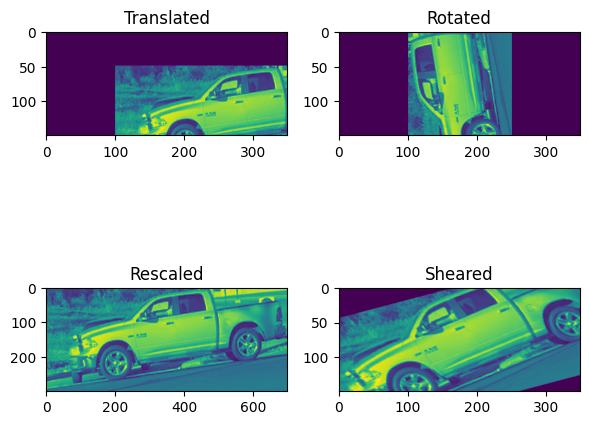

In [7]:
imgs = [translated_img, rotated_img, rescaled_img, sheared_img]
titles=['Translated', 'Rotated', 'Rescaled', 'Sheared']
display_images(images=imgs, titles=titles, is_axis=True, is_gray=False)

## **Filtering Linear—Konvolusi dengan Kernel**
---

**Konvolusi** dalam visi komputer adalah operasi aljabar linier dari dua array (salah satunya adalah gambar dan yang lainnya adalah array kecil) untuk menghasilkan array gambar yang difilter yang bentuknya berbeda dari array gambar asli. Konvolusi bersifat kumulatif dan asosiatif. Ini dapat direpresentasikan secara matematis sebagai berikut:

$$
G(x,y) = \sum_{i=-n}^{m} \sum_{j=-n}^{m} F(i,j) \cdot U(x-i, y-j)
$$

Dalam rumus di atas:
- \(F(x,y)\) adalah gambar asli.
- \(G(x,y)\) adalah gambar yang telah difilter.
- \(U\) adalah kernel gambar.

Tergantung pada jenis kernel, \(U\), gambar keluaran akan berbeda.

(150, 350, 3)


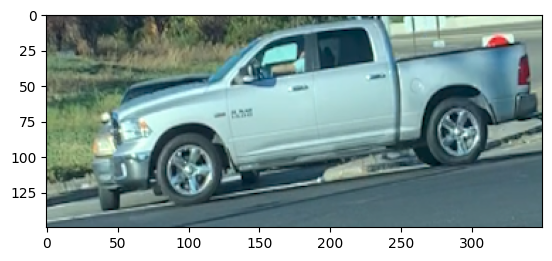

In [8]:
image = cv2.imread(parent_path+'/car1.png', cv2.COLOR_RGB2BGR)
image_color_fix = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
print(image_color_fix.shape)
plt.imshow(image_color_fix)
plt.show()

(150, 350, 4)


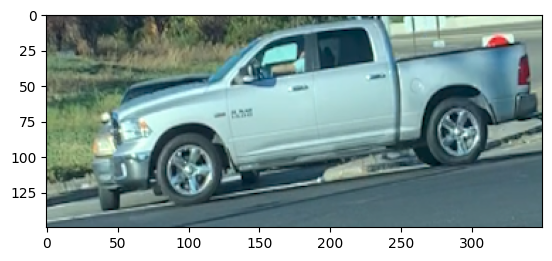

In [9]:
image = Image.open(parent_path + '/car1.png')
print(np.array(image).shape)
plt.imshow(image)
plt.show()

##### Alasan kenapa saya read gambar dengan PIL bukan cv2, karna pada PIL tampilan warna citra langsung benar tidak perlu dikonversi seperti pada cv2

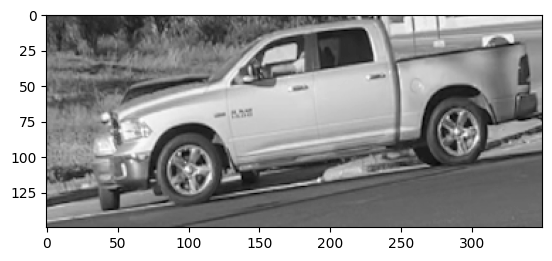

In [10]:
image_gray = Image.open(parent_path + '/car1.png').convert('L')
image_arr = np.array(image_gray)

plt.imshow(image_arr, cmap='gray')
plt.show()

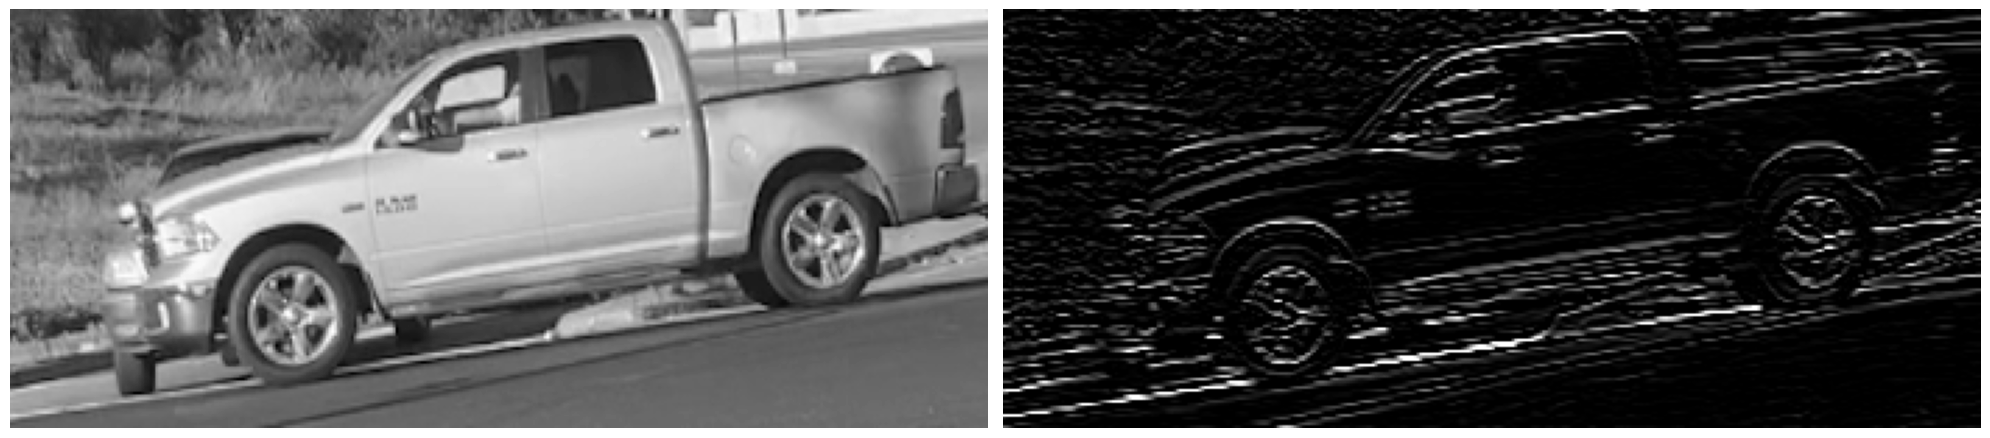

In [11]:
kernel = np.array(
    [
        [-1, -1, -1], 
        [ 2,  2,  2], 
        [-1, -1, -1], 
    ]
)


blurring = cv2.filter2D(image_arr,-1, kernel) 

imgs = [image_arr, blurring]
display_images(images=imgs, figsize_per_image=(10, 8), is_gray=True)

Gambar di sebelah kiri adalah gambar masukan dan gambar di sebelah kanan adalah gambar yang diperoleh dengan menerapkan kernel horizontal ke gambar. Kernel horizontal hanya mendeteksi tepi horizontal, yang dapat dilihat dari garis-garis putih horizontal. Detail tentang kernel horizontal dapat dilihat di bagian Gradien Gambar.

Kode di atas mengimpor pustaka Python yang diperlukan untuk pekerjaan pembelajaran mesin dan visi komputer, seperti NumPy untuk memproses array, cv2 untuk pekerjaan visi komputer OpenCV, PIL untuk memproses gambar dalam kode Python, dan Matplotlib untuk memplot hasil. Kemudian mengimpor gambar menggunakan PIL dan mengubahnya menjadi skala abu-abu menggunakan fungsi skala OpenCV BGR2GRAY. Membuat kernel untuk filtering tepi menggunakan array NumPy, mengaburkan gambar menggunakan kernel, dan kemudian menampilkannya menggunakan fungsi imshow().

Operasi filtering dibagi menjadi tiga kelas berbeda:
1. **Penghalusan Gambar (Image Smoothing)**
2. **Gradien Gambar (Image Gradient)**
3. **Pengasahan Gambar (Image Sharpening)**

### **Image Smoothing**
---

Image smoothing adalah teknik dalam pemrosesan citra yang bertujuan untuk mengurangi noise frekuensi tinggi dari sebuah gambar. Noise ini dapat berupa gangguan acak yang membuat gambar terlihat kasar atau tidak jelas. Untuk menghilangkan noise ini, digunakan filter low-pass, seperti:

- **Mean Filter**
- **Median Filter**
- **Gaussian Filter**

Proses ini menghasilkan gambar yang lebih halus dengan mengubah nilai piksel sehingga tidak berubah tanda dan tidak berbeda secara signifikan. Image filtering biasanya dilakukan dengan menggeser filter kotak (box filter) di atas gambar. Filter kotak ini direpresentasikan oleh kernel $ n \times m $ yang dibagi dengan $ n \times m $, di mana $ n $ adalah jumlah baris dan $ m $ adalah jumlah kolom. Untuk kernel 3 x 3, bentuknya adalah sebagai berikut:

$$
\frac{1}{9} \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}
$$

#### **Mean Filter**
---

Mean filter bekerja dengan menggantikan nilai piksel dengan nilai rata-rata setelah operasi konvolusi dari kernel kotak dilakukan pada gambar. Misalnya, jika kita memiliki gambar RGB dengan nilai 3 x 3 sebagai berikut:

$$
\begin{bmatrix}
34 & 45 & 56 \\
78 & 166 & 89 \\
23 & 54 & 67 \\
\end{bmatrix}
$$

Setelah menerapkan mean filter, nilai rata-rata dari kernel akan menggantikan nilai intensitas pusat (166) dalam gambar. Nilai rata-rata adalah 42, sehingga array hasilnya adalah:

$$
\begin{bmatrix}
34 & 45 & 56 \\
78 & 42 & 89 \\
23 & 54 & 67 \\
\end{bmatrix}
$$

#### **Median Filter**
---

Median filter menggantikan nilai piksel dengan nilai median setelah operasi konvolusi dari kernel kotak dilakukan pada gambar. Misalnya, jika kita memiliki gambar yang sama seperti di atas, setelah menerapkan median filter, nilai median dari kernel akan menggantikan nilai intensitas pusat (166) dalam gambar. Nilai median adalah 48, sehingga array hasilnya adalah:

$$
\begin{bmatrix}
34 & 45 & 56 \\
78 & 48 & 89 \\
23 & 54 & 67 \\
\end{bmatrix}
$$

#### **Gaussian Filter**
---

Gaussian filter menggunakan kernel Gaussian yang direpresentasikan oleh persamaan berikut:

$$
G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

Di mana $ \sigma $ adalah standar deviasi dari distribusi dan $ k $ adalah ukuran kernel. Untuk standar deviasi $ \sigma = 1 $ dan kernel 3 x 3 ($ k = 3 $), kernel Gaussian terlihat sebagai berikut:

$$
\begin{bmatrix}
0.0751 & 0.1238 & 0.0751 \\
0.1238 & 0.2042 & 0.1238 \\
0.0751 & 0.1238 & 0.0751 \\
\end{bmatrix}
$$

Ketika kernel Gaussian diterapkan, gambar akan diubah sebagai berikut:

$$
\begin{bmatrix}
34 & 45 & 56 \\
78 & 54 & 89 \\
23 & 54 & 67 \\
\end{bmatrix}
$$

##### Mengapa Perlu Dipelajari?

1. **Peningkatan Kualitas Gambar**: Image smoothing membantu meningkatkan kualitas visual gambar dengan mengurangi noise dan membuat gambar lebih jelas.
2. **Pra-pemrosesan untuk Analisis Lanjutan**: Teknik ini sering digunakan sebagai langkah awal dalam analisis gambar lebih lanjut, seperti deteksi tepi, segmentasi, dan pengenalan objek.
3. **Aplikasi Luas**: Digunakan dalam berbagai bidang seperti fotografi digital, pengolahan medis, pengawasan keamanan, dan pengenalan wajah.
4. **Pemahaman Dasar Pemrosesan Citra**: Memahami teknik ini memberikan dasar yang kuat dalam pemrosesan citra dan membantu dalam mempelajari teknik yang lebih kompleks.

Dengan memahami dan menerapkan teknik image smoothing, kita dapat meningkatkan kualitas gambar dan mempersiapkannya untuk analisis lebih lanjut, yang sangat penting dalam berbagai aplikasi teknologi dan ilmiah.

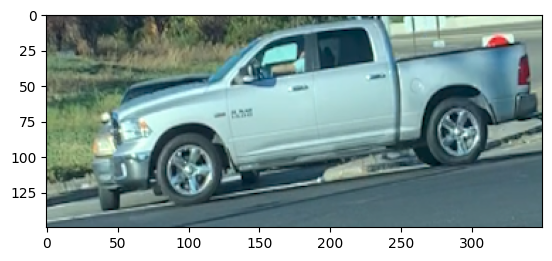

In [12]:
image_rgb = cv2.imread(parent_path + '/car1.png')
# image_rgb_resized = cv2.resize(image_rgb, (100, 100), cv2.INTER_CUBIC)
image_brg = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

# image = Image.open(parent_path + '/car1.png')
# image_resized = image.resize((100, 100))
# image = np.array(image_resized)

plt.imshow(image_brg)
plt.show()

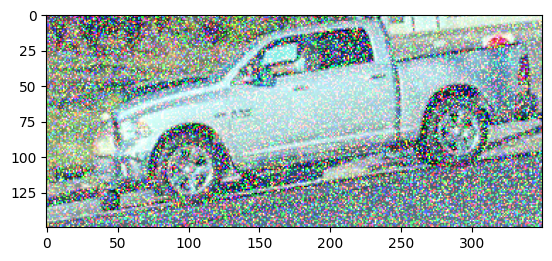

In [13]:
image_bgr_noised = add_noise(image_brg, noise_level=1.5)

plt.imshow(image_bgr_noised)
plt.show()

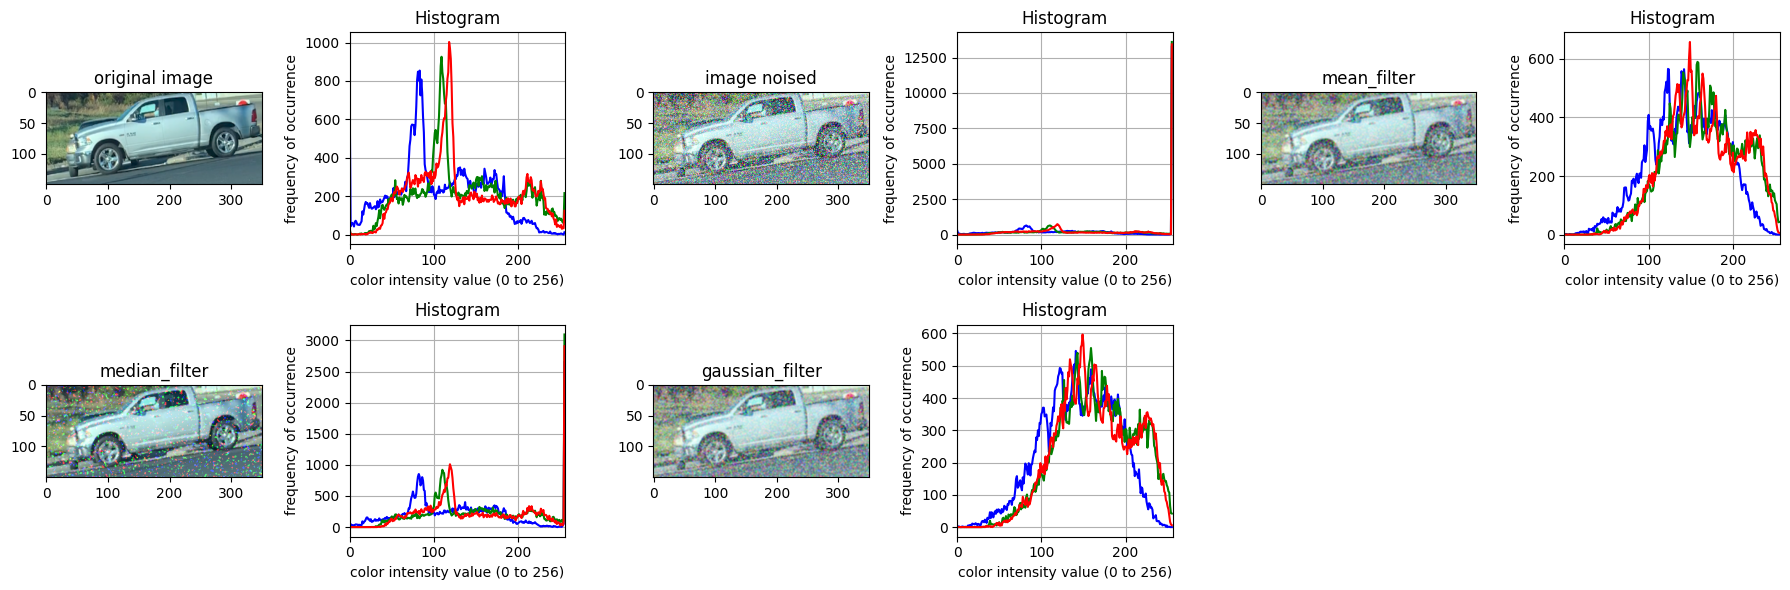

In [14]:
n_kernel = 3

mean_filter = cv2.blur(image_bgr_noised, ksize=(n_kernel,n_kernel))
median_filter = cv2.medianBlur(image_bgr_noised, ksize=n_kernel)
gaussian_filter = cv2.GaussianBlur(image_bgr_noised, ksize=(n_kernel,n_kernel), sigmaX=2)

imgs = [image_brg, image_bgr_noised, mean_filter, median_filter, gaussian_filter]
titles = ['original image', 'image noised', 'mean_filter', 'median_filter', 'gaussian_filter']
display_images(images=imgs, titles=titles, is_axis=True, show_histogram=True)

### **Image Gradient**
---

**Image gradient** adalah metode untuk menghitung perubahan intensitas piksel dalam suatu arah tertentu pada gambar. Perubahan intensitas piksel ini diperoleh dengan melakukan operasi konvolusi pada gambar menggunakan kernel. Kernel dipilih sedemikian rupa sehingga dua baris atau kolom ekstrem memiliki tanda yang berlawanan (positif dan negatif), sehingga menghasilkan operator perbedaan saat mengalikan dan menjumlahkan piksel gambar.

#### Contoh Kernel
- **Kernel Horizontal (Sobel Operator):**
  $$
  \begin{bmatrix}
  -1 & 0 & 1 \\
  -2 & 0 & 2 \\
  -1 & 0 & 1
  \end{bmatrix}
  $$
- **Kernel Vertikal (Sobel Operator):**
  $$
  \begin{bmatrix}
  -1 & -2 & -1 \\
  0 & 0 & 0 \\
  1 & 2 & 1
  \end{bmatrix}
  $$

#### Perhitungan Matematis
Misalkan kita memiliki gambar dengan matriks intensitas piksel sebagai berikut:
$$
\begin{bmatrix}
10 & 10 & 10 \\
20 & 20 & 20 \\
30 & 30 & 30
\end{bmatrix}
$$

Untuk menghitung gradient horizontal, kita lakukan konvolusi dengan kernel horizontal:
$$
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
\ast
\begin{bmatrix}
10 & 10 & 10 \\
20 & 20 & 20 \\
30 & 30 & 30
\end{bmatrix}
$$

Hasil konvolusi ini akan memberikan matriks baru yang menunjukkan perubahan intensitas piksel dalam arah horizontal.

#### Aplikasi Image Gradient
Image gradient digunakan untuk mendeteksi tepi dan sudut dalam gambar. Tepi dan sudut ini mengandung banyak informasi tentang bentuk atau fitur dari gambar. Dengan menggunakan image gradient, informasi piksel tingkat rendah dapat diubah menjadi fitur gambar tingkat tinggi, yang kemudian digunakan dalam operasi konvolusi untuk klasifikasi gambar.

#### Mengapa Kita Perlu Mempelajarinya?
1. **Deteksi Tepi:** Image gradient membantu dalam mendeteksi tepi objek dalam gambar, yang penting untuk segmentasi gambar dan pengenalan objek.
2. **Pengenalan Pola:** Dengan mendeteksi fitur seperti tepi dan sudut, kita dapat mengenali pola dan bentuk dalam gambar, yang berguna dalam aplikasi seperti pengenalan wajah dan pengenalan tulisan tangan.
3. **Pemrosesan Gambar:** Image gradient adalah dasar dari banyak algoritma pemrosesan gambar, termasuk filter Sobel, Canny edge detector, dan lainnya.

Dengan memahami dan menggunakan image gradient, kita dapat mengembangkan sistem visi komputer yang lebih canggih dan akurat.

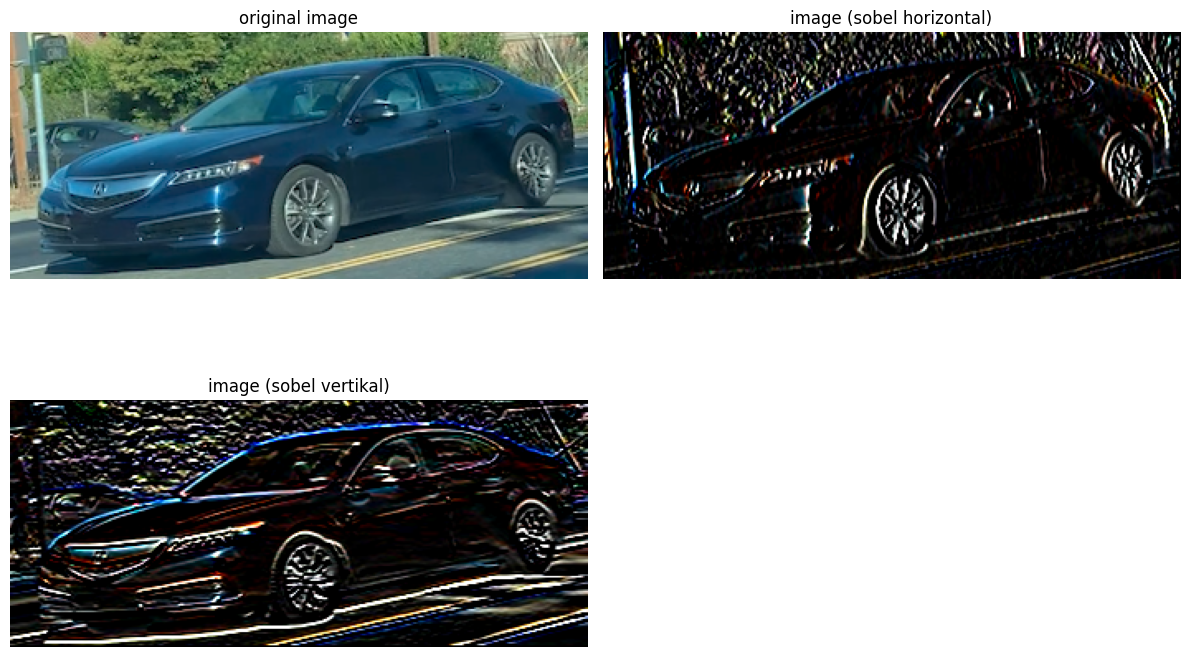

In [15]:
image_rgb = cv2.imread(parent_path + '/car2.png')
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

sobel_kernel = np.array(
    [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1],
    ]
)

# kernel_diagonal = np.array(
#     [
#         [ 0,  1,  2],
#         [-1,  0,  1],
#         [-2, -1,  0],
#     ]
# )

image_sobel_H = cv2.filter2D(src=image_bgr, ddepth=-1, kernel=sobel_kernel) # when ddepth=-1, the output image will have the same depth as the source.
image_sobel_V = cv2.filter2D(src=image_bgr, ddepth=-1, kernel=sobel_kernel.T)

titles = ['original image', 'image (sobel horizontal)', 'image (sobel vertikal)']
imgs = [image_bgr, image_sobel_H, image_sobel_V]

display_images(images=imgs, titles=titles, figsize_per_image=(6, 4))

### **Image Sharpening**
---

**Image sharpening** adalah proses untuk meningkatkan ketajaman gambar dengan menghilangkan noise frekuensi rendah menggunakan filter high-pass (operator perbedaan). Proses ini membuat struktur garis dan tepi menjadi lebih terlihat. Image sharpening juga dikenal sebagai operasi Laplace, yang direpresentasikan oleh turunan kedua.

#### Kernel Laplace
Kernel Laplace adalah contoh dari filter high-pass yang digunakan untuk image sharpening. Kernel ini memiliki sifat bahwa empat sel yang berdekatan dengan titik tengah kernel selalu memiliki tanda yang berlawanan. Jika titik tengah kernel positif, maka empat sel yang berdekatan negatif, dan sebaliknya.

Contoh kernel Laplace:
$$
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{bmatrix}
$$

#### Perhitungan Matematis
Misalkan kita memiliki gambar dengan matriks intensitas piksel sebagai berikut:
$$
\begin{bmatrix}
10 & 10 & 10 \\
20 & 20 & 20 \\
30 & 30 & 30
\end{bmatrix}
$$

Untuk menghitung hasil image sharpening, kita lakukan konvolusi dengan kernel Laplace:
$$
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{bmatrix}
\ast
\begin{bmatrix}
10 & 10 & 10 \\
20 & 20 & 20 \\
30 & 30 & 30
\end{bmatrix}
$$

Hasil konvolusi ini akan memberikan matriks baru yang menunjukkan perubahan intensitas piksel yang lebih tajam.

#### Aplikasi Image Sharpening
Image sharpening digunakan dalam berbagai aplikasi, termasuk:
1. **Peningkatan Kualitas Gambar:** Membuat gambar lebih tajam dan jelas, yang penting dalam fotografi dan pengolahan gambar medis.
2. **Deteksi Tepi:** Membantu dalam mendeteksi tepi objek dalam gambar, yang penting untuk segmentasi gambar dan pengenalan objek.
3. **Pengenalan Pola:** Dengan meningkatkan ketajaman fitur seperti tepi dan sudut, kita dapat mengenali pola dan bentuk dalam gambar dengan lebih baik.

#### Mengapa Kita Perlu Mempelajarinya?
1. **Peningkatan Visual:** Membantu dalam meningkatkan kualitas visual gambar, yang penting dalam berbagai bidang seperti fotografi, pengolahan gambar medis, dan pengawasan.
2. **Analisis Gambar:** Memungkinkan analisis gambar yang lebih akurat dengan meningkatkan ketajaman fitur penting dalam gambar.
3. **Pengenalan Objek:** Membantu dalam pengenalan objek dan pola dengan meningkatkan visibilitas fitur penting dalam gambar.

Dengan memahami dan menggunakan image sharpening, kita dapat mengembangkan sistem pengolahan gambar yang lebih canggih dan akurat.

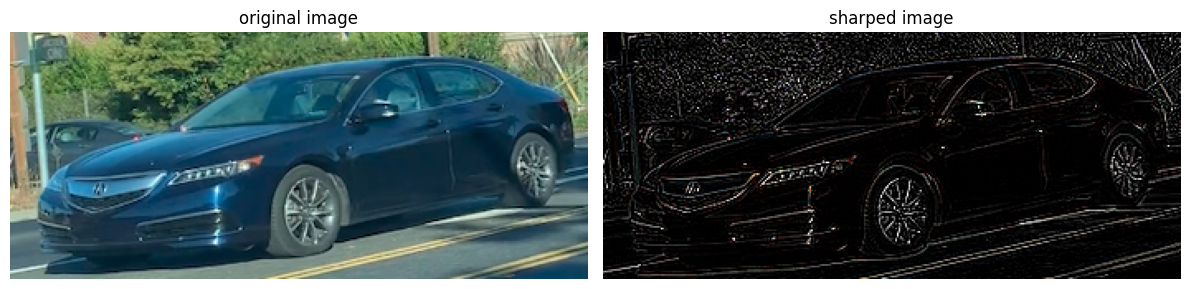

In [16]:
image_rgb = cv2.imread(parent_path + '/car2.png')
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
# image_noised = add_noise(image_bgr, noise_level=.75)

kernel_sharpening = np.array(
    [
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0],
    ]
)

image_sharped = cv2.filter2D(src=image_bgr, ddepth=-1, kernel=kernel_sharpening) # ddepth: It is the desirable depth of destination image. Value -1 represents that the resulting image will have same depth as the source image.

titles = ['original image', 'sharped image']
imgs = [image_bgr, image_sharped]

display_images(images=imgs, titles=titles, figsize_per_image=(6, 4))

## **Penggabungan Operasi Gaussian dan Laplacian**
---

**Operasi Gaussian** digunakan untuk mengaburkan gambar dengan cara mengurangi noise frekuensi tinggi. Sebaliknya, **operasi Laplacian** digunakan untuk mempertajam gambar dengan menonjolkan tepi dan fitur. Penggabungan kedua operasi ini sangat penting dalam pengenalan gambar dan deteksi objek.

#### Mengapa Kita Membutuhkan Kedua Operasi?
Gambar terdiri dari karakteristik, fitur, dan objek non-fitur. Pengenalan gambar bertujuan untuk mengekstraksi fitur dari gambar dan menghilangkan objek non-fitur. Kita mengenali gambar sebagai objek tertentu, seperti mobil, karena fitur-fiturnya lebih menonjol dibandingkan dengan non-fitur.

- **Gaussian Filtering:** Metode ini digunakan untuk menekan non-fitur dari fitur, yang mengaburkan gambar. Dengan menerapkan filter Gaussian beberapa kali, gambar menjadi lebih kabur dan menekan baik fitur maupun non-fitur.
- **Laplacian Gradients:** Setelah gambar diburamkan, fitur yang lebih kuat dapat diekstraksi dengan menerapkan gradien Laplacian. Ini membantu menonjolkan fitur secara jelas.

#### Contoh Perhitungan
Misalkan kita memiliki gambar dengan matriks intensitas piksel sebagai berikut:
$$
\begin{bmatrix}
10 & 10 & 10 \\
20 & 20 & 20 \\
30 & 30 & 30
\end{bmatrix}
$$

1. **Gaussian Blur:**
   Kernel Gaussian (misalnya, dengan sigma tertentu):
   $$
   \begin{bmatrix}
   1 & 2 & 1 \\
   2 & 4 & 2 \\
   1 & 2 & 1
   \end{bmatrix}
   $$
   Konvolusi dengan kernel Gaussian akan menghasilkan gambar yang lebih kabur.

2. **Laplacian Sharpening:**
   Kernel Laplacian:
   $$
   \begin{bmatrix}
   0 & -1 & 0 \\
   -1 & 4 & -1 \\
   0 & -1 & 0
   \end{bmatrix}
   $$
   Konvolusi dengan kernel Laplacian pada gambar yang sudah diburamkan akan menonjolkan fitur-fitur utama.

#### Aplikasi Penggabungan Gaussian dan Laplacian
1. **Deteksi Objek:** Teknik ini digunakan dalam banyak operasi konvolusi untuk deteksi objek, seperti pengenalan wajah dan pengenalan tulisan tangan.
2. **Peningkatan Kualitas Gambar:** Membantu dalam meningkatkan kualitas visual gambar dengan menonjolkan fitur penting.
3. **Analisis Gambar:** Memungkinkan analisis gambar yang lebih akurat dengan menonjolkan fitur penting dan mengurangi noise.

#### Mengapa Kita Perlu Mempelajarinya?
1. **Peningkatan Visual:** Membantu dalam meningkatkan kualitas visual gambar, yang penting dalam berbagai bidang seperti fotografi, pengolahan gambar medis, dan pengawasan.
2. **Analisis Gambar:** Memungkinkan analisis gambar yang lebih akurat dengan meningkatkan ketajaman fitur penting dalam gambar.
3. **Pengenalan Objek:** Membantu dalam pengenalan objek dan pola dengan meningkatkan visibilitas fitur penting dalam gambar.

Dengan memahami dan menggunakan penggabungan operasi Gaussian dan Laplacian, kita dapat mengembangkan sistem pengolahan gambar yang lebih canggih dan akurat.

## **Deteksi Tepi dalam Gambar**
---

**Deteksi tepi** adalah metode dasar dalam visi komputer untuk menemukan fitur dalam gambar berdasarkan perubahan kecerahan dan intensitas gambar. Perubahan kecerahan ini terjadi akibat diskontinuitas dalam kedalaman, orientasi, pencahayaan, atau sudut. Metode deteksi tepi dapat didasarkan pada turunan pertama atau kedua.

#### Metode Deteksi Tepi
1. **Turunan Pertama (First Order):**
   - **Sobel Operator:** Menggunakan kernel untuk menghitung gradien intensitas dalam arah horizontal dan vertikal.
   - **Canny Edge Detector:** Menggunakan beberapa langkah termasuk Gaussian blur, gradien intensitas, non-maximum suppression, dan thresholding untuk mendeteksi tepi yang lebih akurat.

2. **Turunan Kedua (Second Order):**
   - **Laplacian Edge Detector:** Menggunakan kernel Laplacian untuk mendeteksi tepi berdasarkan perubahan intensitas yang lebih tajam.

#### Contoh Perhitungan
Misalkan kita memiliki gambar dengan matriks intensitas piksel sebagai berikut:
$$
\begin{bmatrix}
10 & 10 & 10 \\
20 & 20 & 20 \\
30 & 30 & 30
\end{bmatrix}
$$

1. **Sobel Operator:**
   - **Kernel Horizontal:**
     $$
     \begin{bmatrix}
     -1 & 0 & 1 \\
     -2 & 0 & 2 \\
     -1 & 0 & 1
     \end{bmatrix}
     $$
   - **Kernel Vertikal:**
     $$
     \begin{bmatrix}
     -1 & -2 & -1 \\
     0 & 0 & 0 \\
     1 & 2 & 1
     \end{bmatrix}
     $$

   Konvolusi dengan kernel ini akan menghasilkan matriks baru yang menunjukkan perubahan intensitas piksel dalam arah horizontal dan vertikal.

2. **Laplacian Edge Detector:**
   - **Kernel Laplacian:**
     $$
     \begin{bmatrix}
     0 & -1 & 0 \\
     -1 & 4 & -1 \\
     0 & -1 & 0
     \end{bmatrix}
     $$

   Konvolusi dengan kernel ini akan menghasilkan matriks baru yang menunjukkan perubahan intensitas piksel yang lebih tajam.

#### Aplikasi Deteksi Tepi
1. **Segmentasi Gambar:** Membantu dalam memisahkan objek dalam gambar berdasarkan tepi mereka.
2. **Pengenalan Objek:** Digunakan dalam aplikasi seperti pengenalan wajah, pengenalan tulisan tangan, dan deteksi objek.
3. **Pemrosesan Gambar Medis:** Membantu dalam mendeteksi batas-batas organ atau tumor dalam gambar medis.

#### Mengapa Kita Perlu Mempelajarinya?
1. **Peningkatan Kualitas Gambar:** Membantu dalam meningkatkan kualitas visual gambar dengan menonjolkan tepi dan fitur penting.
2. **Analisis Gambar:** Memungkinkan analisis gambar yang lebih akurat dengan menonjolkan fitur penting dan mengurangi noise.
3. **Pengenalan Objek:** Membantu dalam pengenalan objek dan pola dengan meningkatkan visibilitas fitur penting dalam gambar.

Dengan memahami dan menggunakan teknik deteksi tepi, kita dapat mengembangkan sistem visi komputer yang lebih canggih dan akurat.

### **Sobel dan Canny Edge Detectors**
---

#### Sobel Edge Detector
**Sobel operator** mendeteksi tepi dengan menghitung gradien (Sobelx dan Sobely) dari fungsi intensitas gambar. Gradien ini dihitung dengan menerapkan kernel pada gambar. Kernel yang digunakan biasanya berukuran 3x3, tetapi dalam contoh ini, ukuran kernel (ksize) adalah 5.

Contoh kode untuk Sobel edge detection:

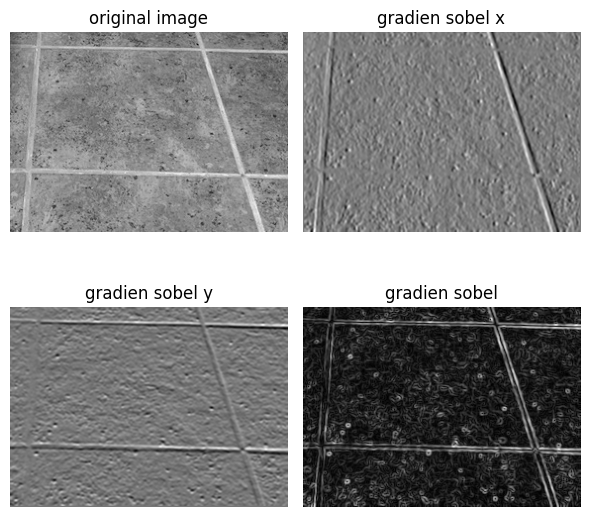

In [17]:
# Membaca gambar dalam mode grayscale
gray = cv2.imread(parent_path + '/tile.jpeg', cv2.IMREAD_GRAYSCALE)

# Menghitung gradien Sobel dalam arah x dan y
sobelX = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=5)
sobelY = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=5)

# Menghitung magnitudo dan arah gradien
mag, direction = cv2.cartToPolar(sobelX, sobelY, angleInDegrees=True)

# Menghitung gradien Sobel
sobelG = np.hypot(sobelX, sobelY)

titles = ['original image', 'gradien sobel x', 'gradien sobel y', 'gradien sobel']
imgs = [gray, sobelX, sobelY, sobelG]
display_images(images=imgs, titles=titles, is_gray=True)

CV_8U - 8-bit unsigned integers ( 0..255 ) => 8-bit unsigned integer (uchar). 

CV_8S - 8-bit signed integers ( -128..127 ) => 8-bit signed integer (schar). 

CV_16U - 16-bit unsigned integers ( 0..65535 ) => 16-bit unsigned integer (ushort). 

CV_16S - 16-bit signed integers ( -32768..32767 ) => 16-bit signed integer (short). 

CV_32S - 32-bit signed integers ( -2147483648..2147483647 ) => 32-bit signed integer (int). 

CV_32F - 32-bit floating-point numbers ( -FLT_MAX..FLT_MAX, INF, NAN ) => 32-bit floating-point number (float). 

CV_64F - 64-bit floating-point numbers ( -DBL_MAX..DBL_MAX, INF, NAN ) => 64-bit floating-point number (double). 


enum { CV_8U=0, CV_8S=1, CV_16U=2, CV_16S=3, CV_32S=4, CV_32F=5, CV_64F=6 };


### **Canny Edge Detector**
---

**Canny edge detector** menggunakan filter Gaussian dua dimensi untuk menghilangkan noise, kemudian menerapkan deteksi tepi Sobel dengan non-maximum suppression untuk memilih nilai rasio maksimum antara gradien x dan y pada setiap titik piksel, dan akhirnya menerapkan thresholding tepi untuk mendeteksi apakah ada tepi atau tidak.

### Aplikasi dan Kegunaan
1. **Deteksi Tepi:** Sobel dan Canny edge detectors digunakan untuk mendeteksi tepi objek dalam gambar, yang penting untuk segmentasi gambar dan pengenalan objek.
2. **Peningkatan Kualitas Gambar:** Membantu dalam meningkatkan kualitas visual gambar dengan menonjolkan tepi dan fitur penting.
3. **Analisis Gambar:** Memungkinkan analisis gambar yang lebih akurat dengan menonjolkan fitur penting dan mengurangi noise.

#### Mengapa Kita Perlu Mempelajarinya?
1. **Peningkatan Visual:** Membantu dalam meningkatkan kualitas visual gambar, yang penting dalam berbagai bidang seperti fotografi, pengolahan gambar medis, dan pengawasan.
2. **Analisis Gambar:** Memungkinkan analisis gambar yang lebih akurat dengan meningkatkan ketajaman fitur penting dalam gambar.
3. **Pengenalan Objek:** Membantu dalam pengenalan objek dan pola dengan meningkatkan visibilitas fitur penting dalam gambar.

Dengan memahami dan menggunakan Sobel dan Canny edge detectors, kita dapat mengembangkan sistem visi komputer yang lebih canggih dan akurat.

Contoh kode untuk Canny edge detection:

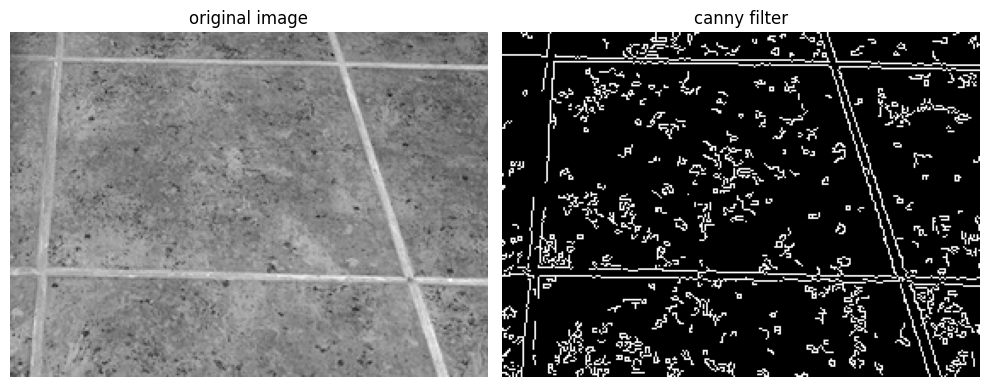

In [18]:
# Membaca gambar dalam mode grayscale
gray = cv2.imread(parent_path + '/tile.jpeg', cv2.IMREAD_GRAYSCALE)

# Menerapkan deteksi tepi Canny
canny = cv2.Canny(gray, threshold1=100, threshold2=200)

titles = ['original image', 'canny filter']
imgs = [gray, canny]

display_images(images=imgs, figsize_per_image=(5, 4), titles=titles, is_gray=True)

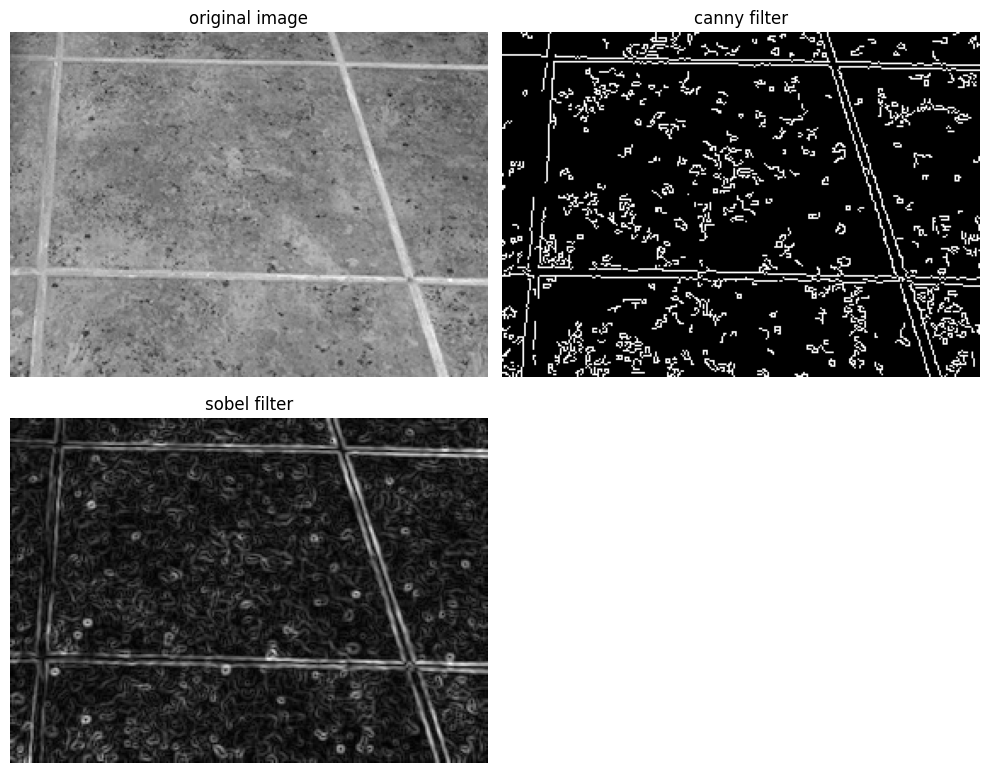

In [19]:
titles = ['original image', 'canny filter', 'sobel filter']
imgs = [gray, canny, sobelG]
display_images(images=imgs, figsize_per_image=(5, 4), titles=titles, is_gray=True)

Seperti yang bisa kita lihat, Canny memiliki kinerja yang jauh lebih baik daripada Sobel dalam mendeteksi mobil. Hal ini karena Canny menggunakan filter Gaussian dua dimensi untuk menghilangkan noise, kemudian menerapkan deteksi tepi Sobel dengan penekanan non-maksimum untuk memilih nilai rasio maksimum antara gradien x dan y pada titik piksel mana pun, dan terakhir, menerapkan edge thresholding untuk mendeteksi apakah ada tepi atau tidak.